In [2]:
import torch

/home/olya/cmc/cmc_env/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
!which python

/home/olya/cmc/cmc_env/bin/python


In [2]:
path = "/home/olya/cmc/vgg16-397923af.pth"
vgg_checkpoint = torch.load(path, map_location=torch.device('cpu'))

In [4]:
for item in vgg_checkpoint:
    print(item)

features.0.weight
features.0.bias
features.2.weight
features.2.bias
features.5.weight
features.5.bias
features.7.weight
features.7.bias
features.10.weight
features.10.bias
features.12.weight
features.12.bias
features.14.weight
features.14.bias
features.17.weight
features.17.bias
features.19.weight
features.19.bias
features.21.weight
features.21.bias
features.24.weight
features.24.bias
features.26.weight
features.26.bias
features.28.weight
features.28.bias
classifier.0.weight
classifier.0.bias
classifier.3.weight
classifier.3.bias
classifier.6.weight
classifier.6.bias


In [8]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg16_bn', pretrained=True)

100%|██████████| 528M/528M [00:22<00:00, 25.0MB/s] 
Using cache found in /home/olya/.cache/torch/hub/pytorch_vision_v0.10.0


In [9]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [4]:
import numpy as np
import torch
import torch.nn.functional as F

In [5]:
h = 8
inp = np.arange(2 * 8 * 8).astype(float)

inp = inp.reshape(1, 2, 8, 8)
x = F.pad(torch.tensor(inp), (1, 1, 1, 1), "constant", 0)
x, x.unfold(3, 4, 2).unfold(2, 4, 2).reshape(1, 2, 4, 4, 16)[:, :, :, :, [5, 6, 9, 10]]

(tensor([[[[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
           [  0.,   0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   0.],
           [  0.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,   0.],
           [  0.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,   0.],
           [  0.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,   0.],
           [  0.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,   0.],
           [  0.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,   0.],
           [  0.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,   0.],
           [  0.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,   0.],
           [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]],
 
          [[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
           [  0.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,   0.],
           [  0.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,   0.],
           [  0.,  80.,  81.,  82.,  83.,  84., 

In [102]:
x.unfold(2, 4, 2).shape

torch.Size([1, 6, 4, 4])

In [90]:
x = torch.arange(8)
x = F.pad(x, (1, 1), "constant", 0)
x, x.unfold(0, 4, 2)

(tensor([0, 0, 1, 2, 3, 4, 5, 6, 7, 0]),
 tensor([[0, 0, 1, 2],
         [1, 2, 3, 4],
         [3, 4, 5, 6],
         [5, 6, 7, 0]]))

In [11]:
h = 8
inp = np.arange(h * h * 2)

inp = inp.reshape(1, 2, h, h)
inp = torch.from_numpy(inp).type(torch.float32)
inp

tensor([[[[  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.],
          [  8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.],
          [ 16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.],
          [ 24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.],
          [ 32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.],
          [ 40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.],
          [ 48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.],
          [ 56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.]],

         [[ 64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.],
          [ 72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.],
          [ 80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.],
          [ 88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.],
          [ 96.,  97.,  98.,  99., 100., 101., 102., 103.],
          [104., 105., 106., 107., 108., 109., 110., 111.],
          [112., 113., 114., 115., 116., 117., 118., 119.],
          [120., 121., 122., 123., 124., 125., 126., 127.]]]])

In [12]:
inp.unfold(2, 2, 2).shape

torch.Size([1, 2, 4, 8, 2])

In [81]:
inp = F.pad(inp, (1, 1, 1, 1), "constant", 0)
# inp

In [69]:
inp.shape

torch.Size([1, 2, 10, 10])

In [84]:
inp.unfold(2, 2, 2).reshape(1, 2, -1, 4)

tensor([[[[  0.,   0.,   0.,   0.],
          [  0.,   1.,   0.,   2.],
          [  0.,   3.,   0.,   4.],
          [  0.,   5.,   0.,   6.],
          [  0.,   7.,   0.,   0.],
          [  0.,   0.,   8.,  16.],
          [  9.,  17.,  10.,  18.],
          [ 11.,  19.,  12.,  20.],
          [ 13.,  21.,  14.,  22.],
          [ 15.,  23.,   0.,   0.],
          [  0.,   0.,  24.,  32.],
          [ 25.,  33.,  26.,  34.],
          [ 27.,  35.,  28.,  36.],
          [ 29.,  37.,  30.,  38.],
          [ 31.,  39.,   0.,   0.],
          [  0.,   0.,  40.,  48.],
          [ 41.,  49.,  42.,  50.],
          [ 43.,  51.,  44.,  52.],
          [ 45.,  53.,  46.,  54.],
          [ 47.,  55.,   0.,   0.],
          [  0.,   0.,  56.,   0.],
          [ 57.,   0.,  58.,   0.],
          [ 59.,   0.,  60.,   0.],
          [ 61.,   0.,  62.,   0.],
          [ 63.,   0.,   0.,   0.]],

         [[  0.,   0.,   0.,  64.],
          [  0.,  65.,   0.,  66.],
          [  0.,  67.,   0

In [70]:
inp.unfold(2, 2, 2).reshape(1, 2, -1, 4)

tensor([[[[  0.,   0.,   0.,   0.],
          [  0.,   1.,   0.,   2.],
          [  0.,   3.,   0.,   4.],
          [  0.,   5.,   0.,   6.],
          [  0.,   7.,   0.,   0.],
          [  0.,   0.,   8.,  16.],
          [  9.,  17.,  10.,  18.],
          [ 11.,  19.,  12.,  20.],
          [ 13.,  21.,  14.,  22.],
          [ 15.,  23.,   0.,   0.],
          [  0.,   0.,  24.,  32.],
          [ 25.,  33.,  26.,  34.],
          [ 27.,  35.,  28.,  36.],
          [ 29.,  37.,  30.,  38.],
          [ 31.,  39.,   0.,   0.],
          [  0.,   0.,  40.,  48.],
          [ 41.,  49.,  42.,  50.],
          [ 43.,  51.,  44.,  52.],
          [ 45.,  53.,  46.,  54.],
          [ 47.,  55.,   0.,   0.],
          [  0.,   0.,  56.,   0.],
          [ 57.,   0.,  58.,   0.],
          [ 59.,   0.,  60.,   0.],
          [ 61.,   0.,  62.,   0.],
          [ 63.,   0.,   0.,   0.]],

         [[  0.,   0.,   0.,  64.],
          [  0.,  65.,   0.,  66.],
          [  0.,  67.,   0

In [48]:
inp.unfold(2, 4, 2).reshape(1, 2, -1, 16)

tensor([[[[  0.,   0.,   0.,   0.,   0.,   0.,   8.,  16.,   0.,   1.,   9.,
            17.,   0.,   2.,  10.,  18.],
          [  0.,   3.,  11.,  19.,   0.,   4.,  12.,  20.,   0.,   5.,  13.,
            21.,   0.,   6.,  14.,  22.],
          [  0.,   7.,  15.,  23.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   8.,  16.,  24.,  32.],
          [  9.,  17.,  25.,  33.,  10.,  18.,  26.,  34.,  11.,  19.,  27.,
            35.,  12.,  20.,  28.,  36.],
          [ 13.,  21.,  29.,  37.,  14.,  22.,  30.,  38.,  15.,  23.,  31.,
            39.,   0.,   0.,   0.,   0.],
          [  0.,   0.,   0.,   0.,  24.,  32.,  40.,  48.,  25.,  33.,  41.,
            49.,  26.,  34.,  42.,  50.],
          [ 27.,  35.,  43.,  51.,  28.,  36.,  44.,  52.,  29.,  37.,  45.,
            53.,  30.,  38.,  46.,  54.],
          [ 31.,  39.,  47.,  55.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,  40.,  48.,  56.,   0.],
          [ 41.,  49.,  57.,   0.,  42.,  50.,  

In [43]:
inp.unfold(2, 4, 2).reshape((1, 2, -1, 16))

tensor([[[[  0.,   0.,   0.,   0.,   0.,   0.,   8.,  16.,   0.,   1.,   9.,
            17.,   0.,   2.,  10.,  18.],
          [  0.,   3.,  11.,  19.,   0.,   4.,  12.,  20.,   0.,   5.,  13.,
            21.,   0.,   6.,  14.,  22.],
          [  0.,   7.,  15.,  23.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   8.,  16.,  24.,  32.],
          [  9.,  17.,  25.,  33.,  10.,  18.,  26.,  34.,  11.,  19.,  27.,
            35.,  12.,  20.,  28.,  36.],
          [ 13.,  21.,  29.,  37.,  14.,  22.,  30.,  38.,  15.,  23.,  31.,
            39.,   0.,   0.,   0.,   0.],
          [  0.,   0.,   0.,   0.,  24.,  32.,  40.,  48.,  25.,  33.,  41.,
            49.,  26.,  34.,  42.,  50.],
          [ 27.,  35.,  43.,  51.,  28.,  36.,  44.,  52.,  29.,  37.,  45.,
            53.,  30.,  38.,  46.,  54.],
          [ 31.,  39.,  47.,  55.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,  40.,  48.,  56.,   0.],
          [ 41.,  49.,  57.,   0.,  42.,  50.,  

In [36]:
inp.unfold(2, 4, 2).shape

torch.Size([1, 2, 4, 10, 4])

In [158]:
inp.unfold(2, 2, 2).reshape((1, 2, -1, 4))

tensor([[[[  0.,   8.,   1.,   9.],
          [  2.,  10.,   3.,  11.],
          [  4.,  12.,   5.,  13.],
          [  6.,  14.,   7.,  15.],
          [ 16.,  24.,  17.,  25.],
          [ 18.,  26.,  19.,  27.],
          [ 20.,  28.,  21.,  29.],
          [ 22.,  30.,  23.,  31.],
          [ 32.,  40.,  33.,  41.],
          [ 34.,  42.,  35.,  43.],
          [ 36.,  44.,  37.,  45.],
          [ 38.,  46.,  39.,  47.],
          [ 48.,  56.,  49.,  57.],
          [ 50.,  58.,  51.,  59.],
          [ 52.,  60.,  53.,  61.],
          [ 54.,  62.,  55.,  63.]],

         [[ 64.,  72.,  65.,  73.],
          [ 66.,  74.,  67.,  75.],
          [ 68.,  76.,  69.,  77.],
          [ 70.,  78.,  71.,  79.],
          [ 80.,  88.,  81.,  89.],
          [ 82.,  90.,  83.,  91.],
          [ 84.,  92.,  85.,  93.],
          [ 86.,  94.,  87.,  95.],
          [ 96., 104.,  97., 105.],
          [ 98., 106.,  99., 107.],
          [100., 108., 101., 109.],
          [102., 110., 103

In [ ]:
inp.unfold(2, self.k[0], self.stride[0]).unfold(3, self.k[1], self.stride[1])

In [61]:
unfold = torch.nn.Unfold(kernel_size=2)
unfold_inp = unfold(inp)
# unfold_inp

In [62]:
unfold_inp.shape

torch.Size([1, 8, 49])

In [63]:
torch.nn.functional.unfold(inp, (2, 2)).shape

torch.Size([1, 8, 49])

In [139]:
unfold_inp_ = unfold_inp.view((1, 2, h-1, h-1, 4))
unfold_inp_ = unfold_inp_[:, :, :, :, :]
unfold_inp_

tensor([[[[[ 0.,  1.,  4.,  5.],
           [ 1.,  2.,  5.,  6.],
           [ 2.,  3.,  6.,  7.]],

          [[ 4.,  5.,  8.,  9.],
           [ 5.,  6.,  9., 10.],
           [ 6.,  7., 10., 11.]],

          [[ 8.,  9., 12., 13.],
           [ 9., 10., 13., 14.],
           [10., 11., 14., 15.]]],


         [[[16., 17., 20., 21.],
           [17., 18., 21., 22.],
           [18., 19., 22., 23.]],

          [[20., 21., 24., 25.],
           [21., 22., 25., 26.],
           [22., 23., 26., 27.]],

          [[24., 25., 28., 29.],
           [25., 26., 29., 30.],
           [26., 27., 30., 31.]]]]])

In [165]:
softmax = torch.nn.Softmax(dim=-1)
w = softmax(unfold_inp * 10)

In [166]:
w

tensor([[[1.9287e-22, 4.2482e-18, 4.5398e-05, 9.9995e-01],
         [1.9287e-22, 4.2482e-18, 4.5398e-05, 9.9995e-01],
         [1.9287e-22, 4.2482e-18, 4.5398e-05, 9.9995e-01],
         [1.9287e-22, 4.2482e-18, 4.5398e-05, 9.9995e-01],
         [1.9287e-22, 4.2482e-18, 4.5398e-05, 9.9995e-01],
         [1.9287e-22, 4.2482e-18, 4.5398e-05, 9.9995e-01],
         [1.9287e-22, 4.2482e-18, 4.5398e-05, 9.9995e-01],
         [1.9287e-22, 4.2482e-18, 4.5398e-05, 9.9995e-01],
         [1.9287e-22, 4.2482e-18, 4.5398e-05, 9.9995e-01],
         [1.9287e-22, 4.2482e-18, 4.5398e-05, 9.9995e-01],
         [1.9287e-22, 4.2482e-18, 4.5398e-05, 9.9995e-01],
         [1.9287e-22, 4.2482e-18, 4.5398e-05, 9.9995e-01],
         [1.9287e-22, 4.2482e-18, 4.5398e-05, 9.9995e-01],
         [1.9287e-22, 4.2482e-18, 4.5398e-05, 9.9995e-01],
         [1.9287e-22, 4.2482e-18, 4.5398e-05, 9.9995e-01],
         [1.9287e-22, 4.2482e-18, 4.5398e-05, 9.9995e-01],
         [1.9287e-22, 4.2482e-18, 4.5398e-05, 9.9995e-01

In [98]:
ans = torch.sum(w * unfold_inp, -1)
ans

tensor([[  65.7616,   66.7616,   67.7616,  ..., 2044.7615, 2045.7615,
         2046.7615]])

In [93]:
ans.view(1, 2, 2, 2)

tensor([[[[ 9.7589, 10.7589],
          [13.7589, 14.7589]],

         [[25.7589, 26.7589],
          [29.7589, 30.7589]]]])

In [45]:
torch.sum(softmax(unfold_inp), dim=-1)

tensor([[1., 1., 1., 1., 1., 1., 1., 1.]])

In [22]:
fold = torch.nn.Fold((1, 2, 2, 2), kernel_size=(2, 2))
unfold = torch.nn.Unfold(kernel_size=(2, 2))

In [27]:
unfold_inp = unfold(inp)
unfold_inp.shape

torch.Size([1, 8, 9])

In [26]:
fold(unfold_inp)

AssertionError: output_size must be int or 2-tuple for 3D input

In [28]:
import torch.nn.functional as F

In [30]:
inp.shape

torch.Size([1, 2, 4, 4])

In [31]:
x = inp.clone()

In [ ]:
def _padding(x):
        if self.same:
            ih, iw = x.size()[2:]
            if ih % self.stride[0] == 0:
                ph = max(self.k[0] - self.stride[0], 0)
            else:
                ph = max(self.k[0] - (ih % self.stride[0]), 0)
            if iw % self.stride[1] == 0:
                pw = max(self.k[1] - self.stride[1], 0)
            else:
                pw = max(self.k[1] - (iw % self.stride[1]), 0)
            pl = pw // 2
            pr = pw - pl
            pt = ph // 2
            pb = ph - pt
            padding = (pl, pr, pt, pb)
        else:
            padding = self.padding
        return padding

In [ ]:
x = F.pad(x, 1, mode='reflect')

In [14]:
maxpool = torch.nn.MaxPool2d(kernel_size=2, stride=2)

In [15]:
h = 8
inp = np.arange(h * h * 2)

inp = inp.reshape(1, 2, h, h)
inp = torch.from_numpy(inp).type(torch.float32)

maxpool(inp).shape

torch.Size([1, 2, 4, 4])

In [1]:
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor()])
                                            # torchvision.transforms.Pad(2, padding_mode="edge")])

train_data = datasets.STL10(root='data/', split="train", download=True, transform=transform)
test_data = datasets.STL10(root='data/', split="test", download=True, transform=transform)


100%|██████████| 2640397119/2640397119 [02:41<00:00, 16362825.24it/s]


Extracting data/stl10_binary.tar.gz to data/
Files already downloaded and verified


In [3]:
len(test_data)

8000

In [5]:

train_data = datasets.KMNIST(root='data/', train=True, download=True, transform=transform)
test_data = datasets.KMNIST(root='data/', train=False, download=True, transform=transform)



100%|██████████| 18165135/18165135 [00:16<00:00, 1127109.16it/s]


Extracting data/KMNIST/raw/train-images-idx3-ubyte.gz to data/KMNIST/raw



100%|██████████| 29497/29497 [00:00<00:00, 120061.01it/s]


Extracting data/KMNIST/raw/train-labels-idx1-ubyte.gz to data/KMNIST/raw



100%|██████████| 3041136/3041136 [00:03<00:00, 970939.36it/s] 


Extracting data/KMNIST/raw/t10k-images-idx3-ubyte.gz to data/KMNIST/raw



100%|██████████| 5120/5120 [00:00<00:00, 7299400.57it/s]

Extracting data/KMNIST/raw/t10k-labels-idx1-ubyte.gz to data/KMNIST/raw



In [8]:
train_data.data.shape


torch.Size([60000, 28, 28])

In [6]:
!pip install matplotlib

  Using cached matplotlib-3.7.1-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (9.2 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached kiwisolver-1.4.4-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.2 MB)
     |████████████████████████████████| 1.0 MB 3.2 MB/s eta 0:00:01
  Using cached contourpy-1.0.7-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (300 kB)


In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
plt.figure(figsize=(10, 5))

plt.title("Настройка коэффициента при max-pool в зависимости от эпохи в mix-pool 2")


t1 = np.load("./params/new_mix2_m_1.npy")
t2 = np.load("./params/new_mix2_m_2.npy")
t3 = np.load("./params/new_mix2_m_3.npy")

# Названия линий для легенды
legend_labels = ['pool1', 'pool2', 'pool3']



# Нарисовать три графика
plt.plot(1/(1 + np.exp(-t1)))
plt.plot(1/(1 + np.exp(-t2)))
plt.plot(1/(1 + np.exp(-t3)))

plt.xlabel("Номер эпохи")
plt.ylabel("Значение коэффициента")
plt.grid(True)

# Добавить легенду
plt.legend(legend_labels)
plt.savefig("./graph/newMix2.pdf", format="pdf", bbox_inches="tight")

# Показать график
plt.show()

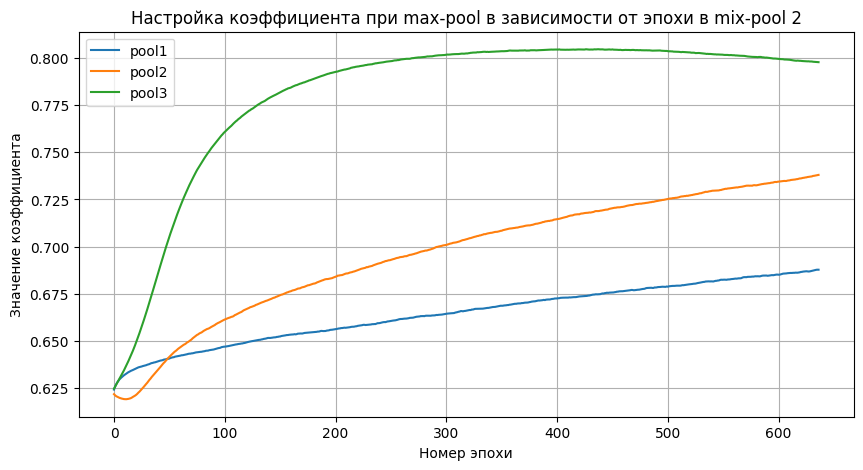

In [2]:
plt.figure(figsize=(10, 5))

plt.title("Настройка коэффициента при max-pool в зависимости от эпохи в mix-pool 2")


t1 = np.load("./params/new_mix2_m_1.npy")
t2 = np.load("./params/new_mix2_m_2.npy")
t3 = np.load("./params/new_mix2_m_3.npy")

# Названия линий для легенды
legend_labels = ['pool1', 'pool2', 'pool3']



# Нарисовать три графика
plt.plot(1/(1 + np.exp(-t1)))
plt.plot(1/(1 + np.exp(-t2)))
plt.plot(1/(1 + np.exp(-t3)))

plt.xlabel("Номер эпохи")
plt.ylabel("Значение коэффициента")
plt.grid(True)

# Добавить легенду
plt.legend(legend_labels)
plt.savefig("./graph/newMix2.pdf", format="pdf", bbox_inches="tight")

# Показать график
plt.show()

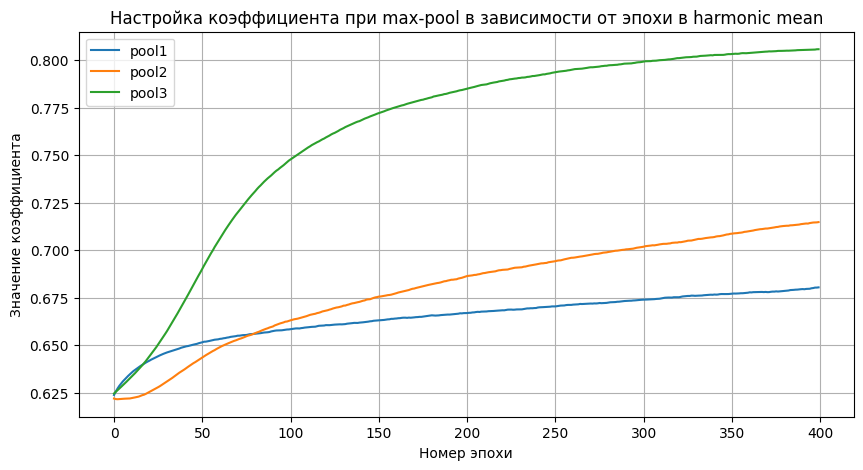

In [3]:
plt.figure(figsize=(10, 5))

plt.title("Настройка коэффициента при max-pool в зависимости от эпохи в harmonic mean")


t1 = np.load("./params/new_harm_m_1.npy")
t2 = np.load("./params/new_harm_m_2.npy")
t3 = np.load("./params/new_harm_m_3.npy")

# Названия линий для легенды
legend_labels = ['pool1', 'pool2', 'pool3']



# Нарисовать три графика
plt.plot(1/(1 + np.exp(-t1)))
plt.plot(1/(1 + np.exp(-t2)))
plt.plot(1/(1 + np.exp(-t3)))

plt.xlabel("Номер эпохи")
plt.ylabel("Значение коэффициента")
plt.grid(True)

# Добавить легенду
plt.legend(legend_labels)
plt.savefig("./graph/harm.pdf", format="pdf", bbox_inches="tight")

# Показать график
plt.show()

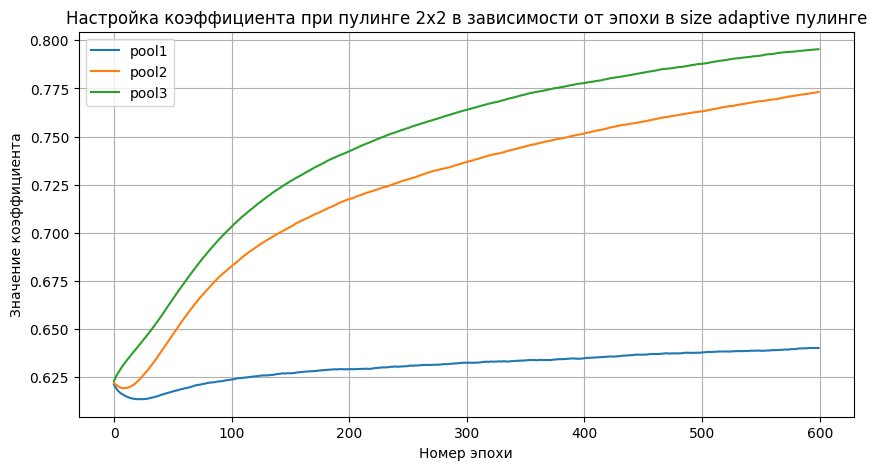

In [27]:
plt.figure(figsize=(10, 5))

plt.title("Настройка коэффициента при пулинге 2x2 в зависимости от эпохи в size adaptive пулинге")


t1 = np.load("./params2/adapt_a1.npy")
t2 = np.load("./params2/adapt_a2.npy")
t3 = np.load("./params2/adapt_a3.npy")

# Названия линий для легенды
legend_labels = ['pool1', 'pool2', 'pool3']



# Нарисовать три графика
plt.plot(1/(1 + np.exp(-t1)))
plt.plot(1/(1 + np.exp(-t2)))
plt.plot(1/(1 + np.exp(-t3)))

plt.xlabel("Номер эпохи")
plt.ylabel("Значение коэффициента")
plt.grid(True)

# Добавить легенду
plt.legend(legend_labels)
plt.savefig("./graph/newAdapt.pdf", format="pdf", bbox_inches="tight")

# Показать график
plt.show()

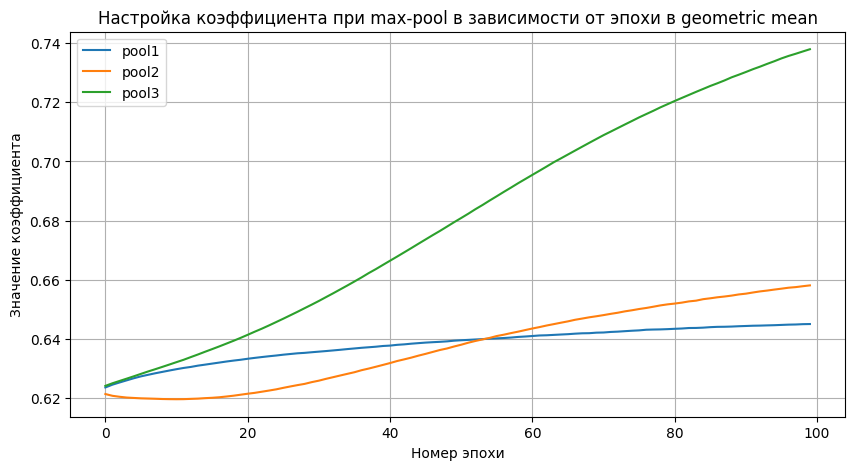

In [6]:
plt.figure(figsize=(10, 5))

plt.title("Настройка коэффициента при max-pool в зависимости от эпохи в geometric mean")


t1 = np.load("./params/new_geom_m_1.npy")
t2 = np.load("./params/new_geom_m_2.npy")
t3 = np.load("./params/new_geom_m_3.npy")

# Названия линий для легенды
legend_labels = ['pool1', 'pool2', 'pool3']



# Нарисовать три графика
plt.plot(1/(1 + np.exp(-t1)))
plt.plot(1/(1 + np.exp(-t2)))
plt.plot(1/(1 + np.exp(-t3)))

plt.xlabel("Номер эпохи")
plt.ylabel("Значение коэффициента")
plt.grid(True)

# Добавить легенду
plt.legend(legend_labels)
plt.savefig("./graph/newGeom.pdf", format="pdf", bbox_inches="tight")

# Показать график
plt.show()

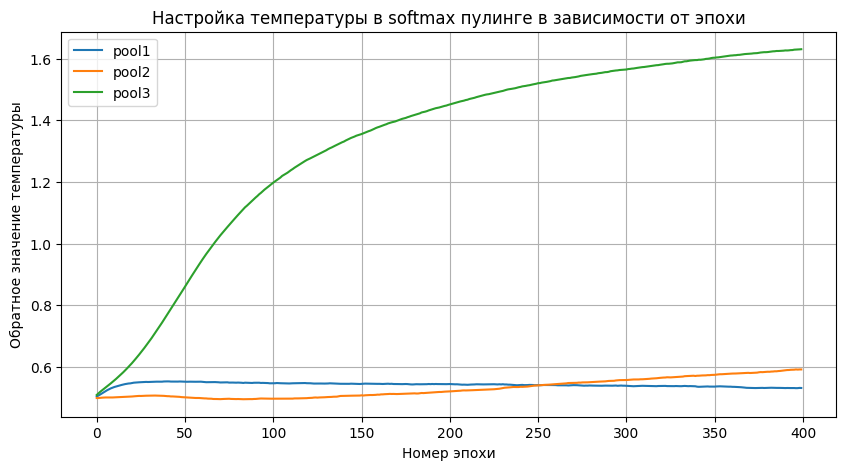

In [5]:
plt.figure(figsize=(10, 5))

plt.title("Настройка температуры в softmax пулинге в зависимости от эпохи")


t1 = np.load("./params/new_softmax_m_1.npy")
t2 = np.load("./params/new_softmax_m_2.npy")
t3 = np.load("./params/new_softmax_m_3.npy")

# Названия линий для легенды
legend_labels = ['pool1', 'pool2', 'pool3']



# Нарисовать три графика
plt.plot(t1)
plt.plot(t2)
plt.plot(t3)


plt.xlabel("Номер эпохи")
plt.ylabel("Обратное значение температуры")
plt.grid(True)

# Добавить легенду
plt.legend(legend_labels)

# Показать график
plt.savefig("./graph/newSoftmax.pdf", format="pdf", bbox_inches="tight")

plt.show()

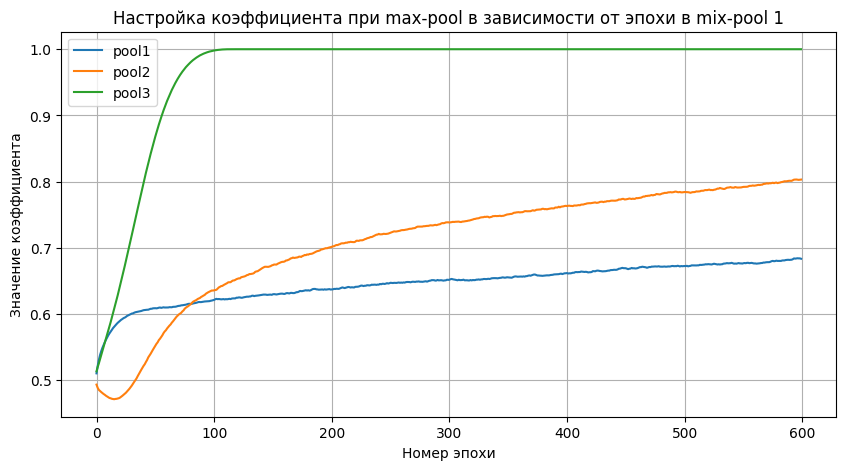

In [23]:
plt.figure(figsize=(10, 5))

plt.title("Настройка коэффициента при max-pool в зависимости от эпохи в mix-pool 1")


t1 = np.load("./params2/mix1_m1.npy")
t2 = np.load("./params2/mix1_m2.npy")
t3 = np.load("./params2/mix1_m3.npy")

c1 = np.load("./params2/mix1_a1.npy")
c2 = np.load("./params2/mix1_a2.npy")
c3 = np.load("./params2/mix1_a3.npy")
# Названия линий для легенды
legend_labels = ['pool1', 'pool2', 'pool3']



# Нарисовать три графика
plt.plot(t1**2 / (t1 ** 2 + c1 ** 2 * np.linspace(1, 1.005, len(c1))))
plt.plot(t2**2 / (t2 ** 2 + c2 ** 2 * np.linspace(1, 1.4, len(c1))))
plt.plot(t3**2 / (t3 ** 2 + c3 ** 2))

plt.xlabel("Номер эпохи")
plt.ylabel("Значение коэффициента")
plt.grid(True)

# Добавить легенду
plt.legend(legend_labels)

# Показать график
plt.savefig("./graph/newMix1.pdf", format="pdf", bbox_inches="tight")

plt.show()

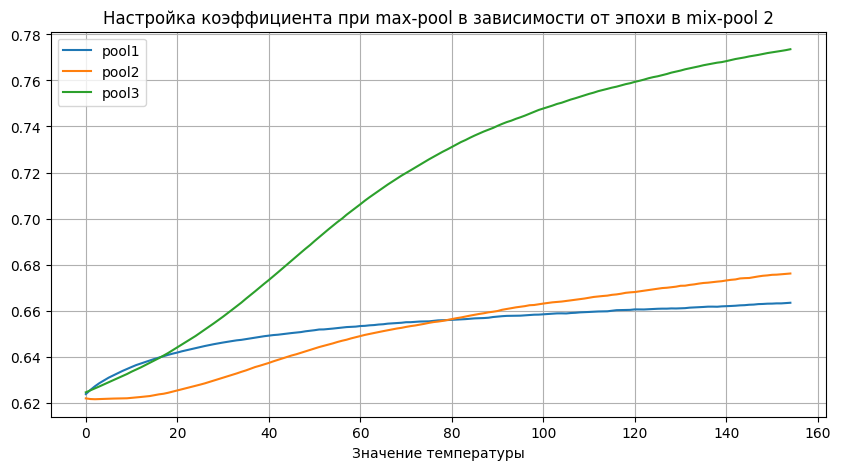

In [5]:
plt.figure(figsize=(10, 5))

plt.title("Настройка коэффициента при max-pool в зависимости от эпохи в mix-pool 1")


t1 = np.load("./params/new_harm_m_1.npy")
t2 = np.load("./params/new_harm_m_2.npy")
t3 = np.load("./params/new_harm_m_3.npy")

# Названия линий для легенды
legend_labels = ['pool1', 'pool2', 'pool3']



# Нарисовать три графика
plt.plot(1/(1 + np.exp(-t1)))
plt.plot(1/(1 + np.exp(-t2)))
plt.plot(1/(1 + np.exp(-t3)))

plt.xlabel("Номер эпохи")
plt.xlabel("Значение температуры")
plt.grid(True)

# Добавить легенду
plt.legend(legend_labels)

# Показать график
plt.show()

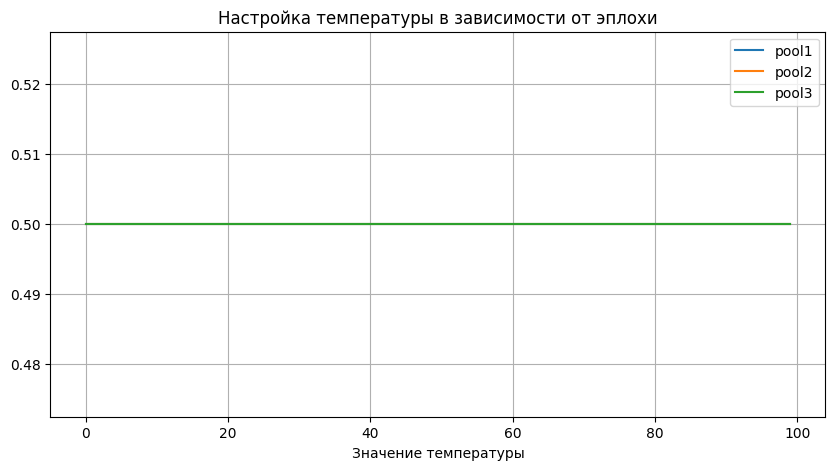

In [18]:
plt.figure(figsize=(10, 5))

plt.title("Настройка температуры в зависимости от эплохи")


t1 = np.load("./params/A1.npy")
t2 = np.load("./params/A2.npy")
t3 = np.load("./params/A3.npy")

# Названия линий для легенды
legend_labels = ['pool1', 'pool2', 'pool3']



# Нарисовать три графика
plt.plot(t1)
plt.plot(t2)
plt.plot(t3)

plt.xlabel("Номер эпохи")
plt.xlabel("Значение температуры")
plt.grid(True)

# Добавить легенду
plt.legend(legend_labels)

# Показать график
plt.show()

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

checkpoint = torch.load("./weights/cifar10_max")

/home/olya/cmc/cmc_env/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
checkpoint.keys()

odict_keys(['conv_layer_1.0.weight', 'conv_layer_1.0.bias', 'conv_layer_1.1.weight', 'conv_layer_1.1.bias', 'conv_layer_1.1.running_mean', 'conv_layer_1.1.running_var', 'conv_layer_1.1.num_batches_tracked', 'conv_layer_1.3.weight', 'conv_layer_1.3.bias', 'conv_layer_2.0.weight', 'conv_layer_2.0.bias', 'conv_layer_2.1.weight', 'conv_layer_2.1.bias', 'conv_layer_2.1.running_mean', 'conv_layer_2.1.running_var', 'conv_layer_2.1.num_batches_tracked', 'conv_layer_2.3.weight', 'conv_layer_2.3.bias', 'conv_layer_3.1.weight', 'conv_layer_3.1.bias', 'conv_layer_3.2.weight', 'conv_layer_3.2.bias', 'conv_layer_3.2.running_mean', 'conv_layer_3.2.running_var', 'conv_layer_3.2.num_batches_tracked', 'conv_layer_3.4.weight', 'conv_layer_3.4.bias', 'fc_layer.1.weight', 'fc_layer.1.bias', 'fc_layer.3.weight', 'fc_layer.3.bias', 'fc_layer.6.weight', 'fc_layer.6.bias'])

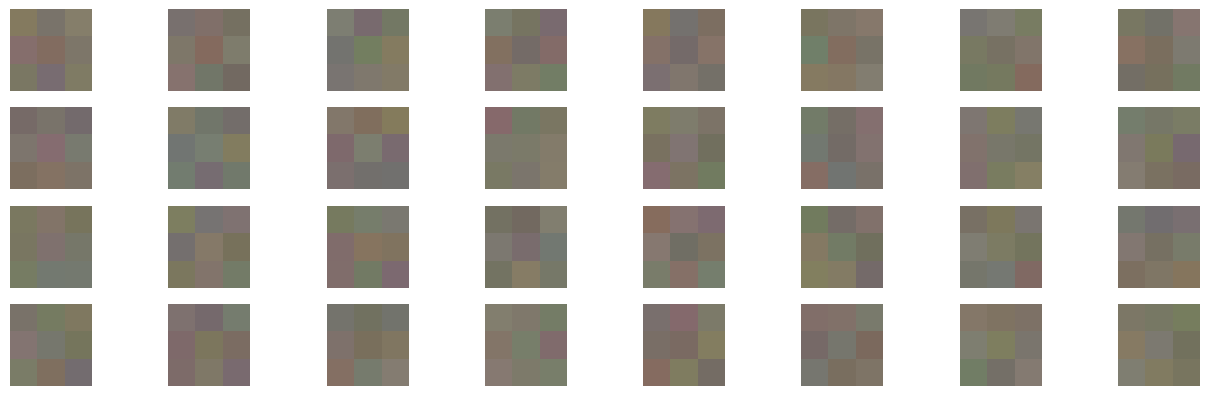

In [12]:
plt.figure(figsize=(16, 10))
for i in range(32):
    plt.subplot(8, 8, i + 1)
    image = checkpoint["conv_layer_1.0.weight"][i].detach().to('cpu').numpy() #[0,:,:]
    image[0] = image[0]*0.229 + 0.485
    image[1] = image[1]*0.224 + 0.456
    image[2] = image[2]*0.225 + 0.406
    plt.imshow(image.transpose((1, 2, 0)) )
    plt.axis('off')

In [11]:
checkpoint_mix_1 = torch.load("./weights/cifar10_max")


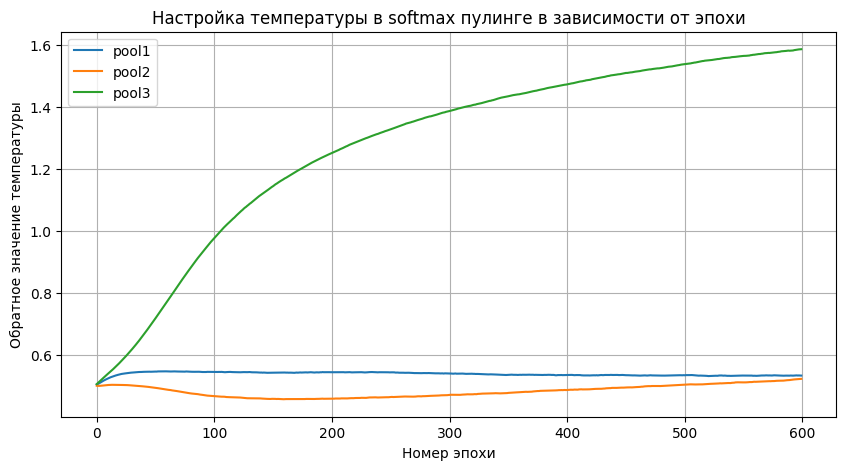

In [28]:
plt.figure(figsize=(10, 5))

plt.title("Настройка температуры в softmax пулинге в зависимости от эпохи")


t1 = np.load("./params2/softmax_1.npy")
t2 = np.load("./params2/softmax_2.npy")
t3 = np.load("./params2/softmax_3.npy")

# Названия линий для легенды
legend_labels = ['pool1', 'pool2', 'pool3']



# Нарисовать три графика
plt.plot(t1)
plt.plot(t2)
plt.plot(t3)


plt.xlabel("Номер эпохи")
plt.ylabel("Обратное значение температуры")
plt.grid(True)

# Добавить легенду
plt.legend(legend_labels)

# Показать график
plt.savefig("./graph/newSoftmax.pdf", format="pdf", bbox_inches="tight")

plt.show()

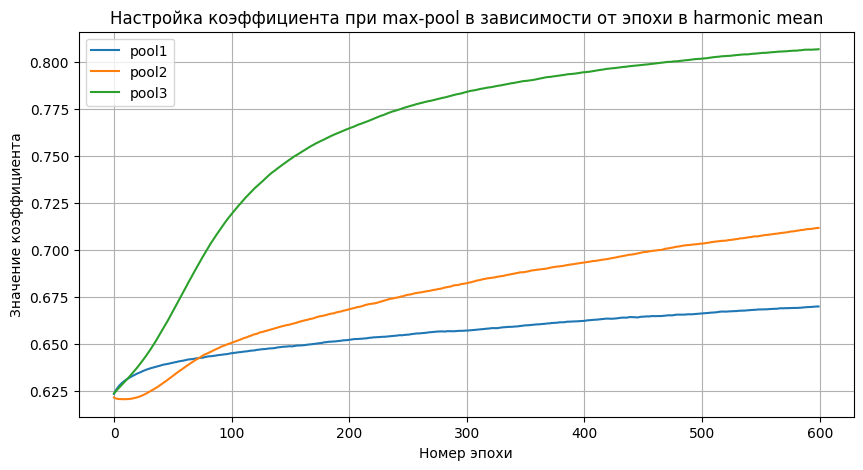

In [6]:
plt.figure(figsize=(10, 5))

plt.title("Настройка коэффициента при max-pool в зависимости от эпохи в harmonic mean")


t1 = np.load("./params2/harm_a1.npy")
t2 = np.load("./params2/harm_a2.npy")
t3 = np.load("./params2/harm_a3.npy")

# Названия линий для легенды
legend_labels = ['pool1', 'pool2', 'pool3']



# Нарисовать три графика
plt.plot(1/(1 + np.exp(-t1)))
plt.plot(1/(1 + np.exp(-t2)))
plt.plot(1/(1 + np.exp(-t3)))

plt.xlabel("Номер эпохи")
plt.ylabel("Значение коэффициента")
plt.grid(True)

# Добавить легенду
plt.legend(legend_labels)
plt.savefig("./graph/newHarm.pdf", format="pdf", bbox_inches="tight")

# Показать график
plt.show()

In [4]:
t1 = np.load("./params2/harm_a1.npy")
t12 = np.load("./params2/geom_a1.npy")

In [5]:
t1 - t12

array([-8.54492188e-04,  3.03506851e-04,  2.28941441e-04, -1.90436840e-04,
       -1.50203705e-04, -2.00748444e-04, -2.96533108e-04, -3.29852104e-04,
       -4.16159630e-04, -2.05934048e-04, -2.96235085e-05,  1.68383121e-04,
        2.30193138e-04,  2.77996063e-04,  3.12089920e-04,  5.04672527e-04,
        2.65002251e-04,  3.93629074e-04,  4.10139561e-04,  4.77313995e-04,
        6.31272793e-04,  6.25848770e-04,  6.00814819e-04,  1.09899044e-03,
        1.45572424e-03,  1.69193745e-03,  1.82783604e-03,  2.18123198e-03,
        2.30556726e-03,  2.05874443e-03,  2.45893002e-03,  2.63708830e-03,
        2.66748667e-03,  2.42519379e-03,  2.77233124e-03,  2.85869837e-03,
        3.36509943e-03,  3.34382057e-03,  3.73816490e-03,  4.01347876e-03,
        4.37545776e-03,  4.37837839e-03,  4.56279516e-03,  4.55611944e-03,
        4.43309546e-03,  4.28938866e-03,  4.60958481e-03,  4.66430187e-03,
        4.78947163e-03,  5.05274534e-03,  5.04070520e-03,  5.49399853e-03,
        5.54054976e-03,  